<h1>
Bank Churn Model
</h1>

<h5>
Objective: Compare the Logistic Regression and Gaussian Naive Bayes algorithm, then use the best performing algorithm for the model
</h5>

In [1]:
import joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

We will load the dataset using pandas library. df will be defined as the placeholder for the csv dataset 


In [2]:
df = pd.read_csv('BankChurners.csv')

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Judging from data and columns, we can infer the following:

1. CLIENTNUM does not hold any value, it is a unique ID used to identify the details of each account

2. Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 and Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 are redundant data
3. Attrition_Flag contains the target variable, which we can identify the customer activity (If the account is closed, it will be 1, else false)
4. Too many data for input in application later on, we will deduct the columns such as Months_Inactive_12_mon, Contacts_Count_12_mon, Avg_Open_To_Buy, Total_Ct_Chng_Q4_Q1, Total_Relationship_Count, Total_Trans_Amt

In [4]:
df.drop(columns=['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True)

By removing the columns, we will be able to make the model predictions accurate

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [6]:
df.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

By using the .info() function, we can infer that the data still has 'object' data types. These data types are not numbers, but strings. However, seeing as some of these columns have binary data, we can turn these string values into numerical

In [7]:
numerical = []
for var in df.columns:
    if df[var].dtype != 'O':
        numerical.append(var)

In [8]:
numerical

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [9]:
new_labels = {}
for column in df.columns:
    if df[column].dtype == object:  # Check if the column contains categorical variables
        unique_values = df[column].unique()
        label_mapping = {}
        
        for index, category in enumerate(unique_values):
            label_mapping[category] = index
            
        new_labels[column] = label_mapping

In [10]:

for col in df.columns:
    if df[str(col)].dtype == object:
        df[str(col)].replace(new_labels[str(col)].keys(), new_labels[str(col)].values(), inplace=True) 

In [11]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,0,0,0,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,1,1,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,1,0,2,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,0,2,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,2,0,0,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,0,2,1,1,3,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,41,0,2,3,3,3,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,44,1,1,0,0,1,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,0,2,1,2,3,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [12]:
for col, categoricals in new_labels.items():
    print(f"{col}: {categoricals}")

Attrition_Flag: {'Existing Customer': 0, 'Attrited Customer': 1}
Gender: {'M': 0, 'F': 1}
Education_Level: {'High School': 0, 'Graduate': 1, 'Uneducated': 2, 'Unknown': 3, 'College': 4, 'Post-Graduate': 5, 'Doctorate': 6}
Marital_Status: {'Married': 0, 'Single': 1, 'Unknown': 2, 'Divorced': 3}
Income_Category: {'$60K - $80K': 0, 'Less than $40K': 1, '$80K - $120K': 2, '$40K - $60K': 3, '$120K +': 4, 'Unknown': 5}
Card_Category: {'Blue': 0, 'Gold': 1, 'Silver': 2, 'Platinum': 3}


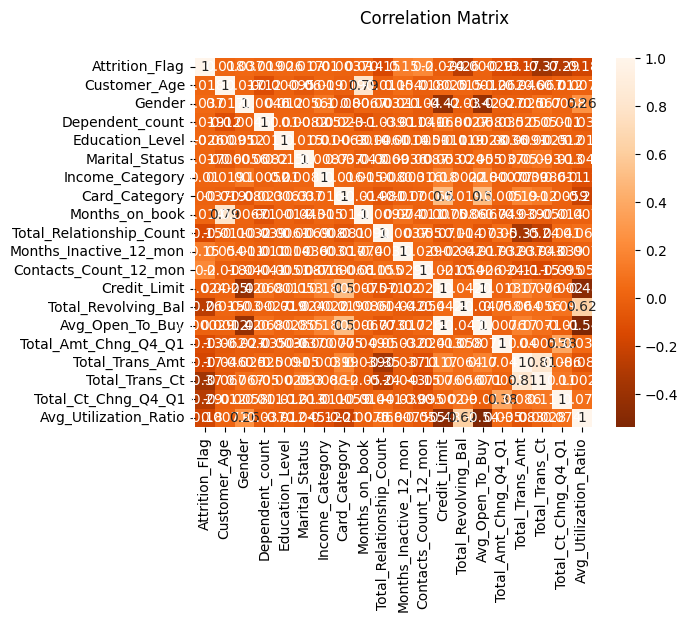

In [13]:
sns.heatmap(df.corr(), cmap= 'Oranges_r', annot= True)
plt.suptitle('Correlation Matrix')
plt.show()

The correlation matrix measures the linear relationship between pairs of variables. The correlation coefficient (ranging from -1 to +1) indicates how strongly two variables are related.

+1 indicates a perfect positive correlation (when one variable increases, the other also increases).

-1 indicates a perfect negative correlation (when one variable increases, the other decreases).

0 indicates no linear correlation.

<h1> Training the Model
</h1>

<h5> Gaussian Naive Bayes
</h5>

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
X = df.drop(columns=['Attrition_Flag'])
y = df['Attrition_Flag']

In [16]:
X.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,0,3,0,0,0,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,1,5,1,1,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,0,3,1,0,2,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,1,4,0,2,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,0,3,2,0,0,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition_Flag, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
gaussianNB_model = GaussianNB()
gaussianNB_model.fit(X_train, y_train)

GaussianNB()

In [20]:
y_pred = gaussianNB_model.predict(X_test)

<h5>Evaluating the Gaussian Naive Bayes Model
</h5>

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.88


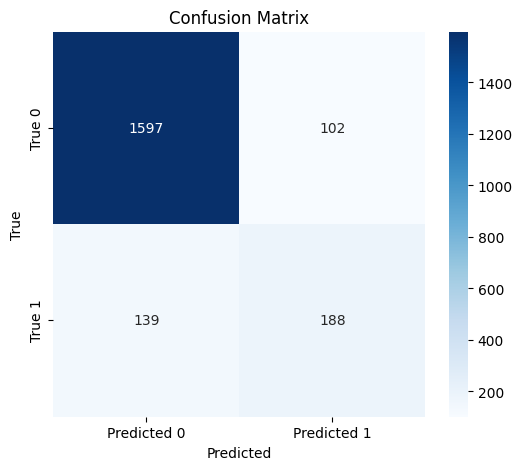

In [22]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Explanation of the terms:

True Positive (TP):
The model correctly predicted the positive class (e.g., predicted 1 when the actual label was 1).


True Negative (TN):
The model correctly predicted the negative class (e.g., predicted 0 when the actual label was 0).


False Positive (FP):
The model incorrectly predicted the positive class (e.g., predicted 1 when the actual label was 0).


False Negative (FN):
The model incorrectly predicted the negative class (e.g., predicted 0 when the actual label was 1).



In [23]:
joblib.dump(gaussianNB_model, 'GNB_bank_churn_model.pkl')
print('Model saved')

Model saved


<h5> Logistic Regression
</h5>

Logistic regression is a supervised machine learning algorithm used for classification tasks where the goal is to predict the probability that an instance belongs to a given class or not. Logistic regression is a statistical algorithm which analyze the relationship between two data factors. The article explores the fundamentals of logistic regression, it’s types and implementations.



In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
# Initialize and train the model
LogisticRegression_model = LogisticRegression(max_iter=5250)  # You can adjust max_iter if needed
LogisticRegression_model.fit(X_train, y_train)

LogisticRegression(max_iter=5250)

In [26]:
# Make predictions
y_pred = LogisticRegression_model.predict(X_test)

<h5>Evaluating the Logistic Regression Model
</h5>



In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


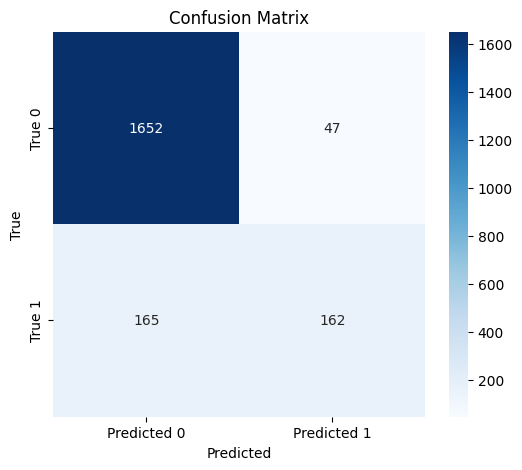

In [28]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Explanation of the terms:

True Positive (TP):
The model correctly predicted the positive class (e.g., predicted 1 when the actual label was 1).


True Negative (TN):
The model correctly predicted the negative class (e.g., predicted 0 when the actual label was 0).


False Positive (FP):
The model incorrectly predicted the positive class (e.g., predicted 1 when the actual label was 0).


False Negative (FN):
The model incorrectly predicted the negative class (e.g., predicted 0 when the actual label was 1).



In [ ]:
df['Contacts_Count_12_mon'].unique()

<h5> Testing the Model </h5>

So, after examining the accuracy of both models, we would like to test the model by having the user input values into different fields for the prediction.

In [29]:
joblib.dump(LogisticRegression_model, 'LR_bank_churn_model.pkl')
print('Model saved')

Model saved
